In [1]:
!pip install SciencePlots
!pip install latex
!pip install gdown
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
# Import all required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sympy as smp
from scipy.optimize import fsolve, newton, curve_fit
import gdown
from shapely.wkt import loads
import zipfile

# Define Classes

In [3]:
class County():
    def __init__(self, ID, name, population, area, geometry):
        self.ID = ID
        self.name = name
        self.population = population
        self.area = area
        self.geometry = geometry

import pyproj
from shapely.ops import transform
proj_wgs84 = pyproj.CRS('EPSG:4326')
proj_california_albers = pyproj.CRS('EPSG:3310')
project = pyproj.Transformer.from_crs(proj_wgs84, proj_california_albers, always_xy=True).transform
class BlockGroup():
    def __init__(self, ID, countyID, population, geometry):
        self.ID = ID
        self.countyID = countyID
        self.population = population
        self.geometry = geometry
        self.area = transform(project, geometry).area*3.861e-7


class RecyclingCenter():
  def __init__(self, ID, address, lat, lon, countyID):
      self.ID = ID #1 to 1244
      self.address = address #full address
      self.lat = lat
      self.lon = lon
      self.countyID = countyID

# Read Input Files

In [4]:
df_recycling_centers = pd.read_csv('https://www.dropbox.com/scl/fi/unnacb85bktf54fhd4x74/Beverage-Container-Recycling-Centers-in-California-RecyclersWithCoords.csv?rlkey=tq93tif5ttnkh5ndnq7x8u2t7&st=2dnjb77n&dl=1')
df_recycling_centers

,ID,recycling location name,address,city,zip,countyID,phone,full address,lat,lon
0,1,American Recycling,15292 Liberty St,San Leandro,94578,6001,(408) 515-9661,"15292 Liberty St San Leandro, CA 94578",37.707433,-122.122518
1,2,Dos Palos Recycling Co,1565 Olivina Ave,Livermore,94551,6001,(209) 518-4771,"1565 Olivina Ave Livermore, CA 94551",37.682620,-121.779073
2,3,Fry's Metals,1845 W Winton Ave,Hayward,94545,6001,(510) 276-4344,"1845 W Winton Ave Hayward, CA 94545",37.653532,-122.126860
3,4,J&D Recycling LLC,1015 N Amphlett Blvd,San Mateo,94401,6081,(650) 685-1901,"1015 N Amphlett Blvd San Mateo, CA 94401",37.585608,-122.331322
4,5,Jado Recycling,39200 Paseo Padre Pkwy,Fremont,94538,6001,(855) 857-8020,"39200 Paseo Padre Pkwy Fremont, CA 94538",37.553851,-121.978888
...,...,...,...,...,...,...,...,...,...,...
1239,1240,Richfield Metal & Recycling,1114 Yolo St,Corning,96021,6103,(530) 988-3033,"1114 Yolo St Corning, CA 96021",39.929197,-122.179971
1240,1241,S & L Recycling,7949 Hwy 99E,Los Molinos,96055,6103,(530) 567-5074,"7949 Hwy 99E Los Molinos, CA 96055",40.128463,-122.122423
1241,1242,RB Recycling,137-1/2 S State St,Earlimart,93219,6107,(559) 799-9513,"137-1/2 S State St Earlimart, CA 93219",35.884005,-119.271261
1242,1243,Camarillo Recycling Inc,849 Via Alondra,Camarillo,93012,6111,(805) 987-0226,"849 Via Alondra Camarillo, CA 93012",34.226666,-119.022989


In [5]:
df_counties = pd.read_csv('https://www.dropbox.com/scl/fi/gibukcy73s1gzf0ff9rol/Beverage-Container-Recycling-Centers-in-California-Counties.csv?rlkey=stjzmgvh3wcyx5q2mha99gfkp&st=y0tzj1qo&dl=1')
df_counties = gpd.GeoDataFrame(df_counties, crs="EPSG:4326", geometry = df_counties['geometry'].apply(loads))
df_counties

,ID,county,population,area,geometry
0,6001,Alameda,1622188,738,"POLYGON ((-122.33371 37.80980, -122.30393 37.8..."
1,6003,Alpine,1141,739,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,6005,Amador,41811,606,"POLYGON ((-121.02751 38.50829, -120.81295 38.5..."
3,6007,Butte,207172,1640,"POLYGON ((-122.04487 39.88377, -121.80404 39.8..."
4,6009,Calaveras,46565,1020,"POLYGON ((-120.99550 38.22540, -120.89286 38.2..."
5,6011,Colusa,22037,1151,"POLYGON ((-122.78509 39.38298, -122.73906 39.3..."
6,6013,Contra Costa,1155025,720,"POLYGON ((-122.42526 37.95567, -122.36758 37.9..."
7,6015,Del Norte,26589,1008,"POLYGON ((-124.21959 41.84643, -124.20340 41.9..."
8,6017,El Dorado,192215,1712,"POLYGON ((-121.14159 38.71194, -121.08734 38.8..."
9,6019,Fresno,1017162,5963,"POLYGON ((-120.65595 36.95283, -120.59057 36.9..."


In [6]:
df_block_groups = pd.read_csv('https://www.dropbox.com/scl/fi/mj8d7zz8yzhcn6vzl4y4j/Beverage-Container-Recycling-Centers-in-California-Block-Groups.csv?rlkey=q50pemcibge36solw42imqxep&st=psh8imca&dl=1')
df_block_groups = gpd.GeoDataFrame(df_block_groups, crs="EPSG:4326", geometry = df_block_groups['geometry'].apply(loads))
df_block_groups

,ID,countyID,county,total,geometry
0,60290021001,6029,Kern County,422,"MULTIPOLYGON (((-119.00074 35.36158, -118.9990..."
1,60290021002,6029,Kern County,984,"MULTIPOLYGON (((-119.00093 35.35922, -119.0009..."
2,60290021003,6029,Kern County,1081,"MULTIPOLYGON (((-119.00301 35.35244, -119.0030..."
3,60290022001,6029,Kern County,1767,"MULTIPOLYGON (((-118.98870 35.36755, -118.9877..."
4,60290022002,6029,Kern County,702,"MULTIPOLYGON (((-118.98859 35.36303, -118.9885..."
...,...,...,...,...,...
23184,60590877014,6059,Orange County,479,"MULTIPOLYGON (((-117.96504 33.82093, -117.9647..."
23185,60590878063,6059,Orange County,3205,"MULTIPOLYGON (((-117.97585 33.81759, -117.9753..."
23186,60590876025,6059,Orange County,852,"MULTIPOLYGON (((-117.95015 33.80840, -117.9501..."
23187,60590879012,6059,Orange County,2125,"MULTIPOLYGON (((-117.99927 33.80282, -117.9992..."


In [7]:
water_zip_file = 'water_areas.zip'
water_zip_url = 'https://www.dropbox.com/scl/fi/5gsenwobsoyfzmmuq4oln/tl_2023_06_areawater.zip?rlkey=d3sfj9zpzoraw1rrz5zadfz98&st=1ylgcnr9&dl=1'
gdown.download(water_zip_url, water_zip_file, quiet=False)

with zipfile.ZipFile(water_zip_file, 'r') as zip_ref:
    zip_ref.extractall('')

Downloading...
From: https://www.dropbox.com/scl/fi/5gsenwobsoyfzmmuq4oln/tl_2023_06_areawater.zip?rlkey=d3sfj9zpzoraw1rrz5zadfz98&st=1ylgcnr9&dl=1
To: /content/water_areas.zip
100%|██████████| 25.6M/25.6M [00:01<00:00, 20.3MB/s]


# Create Objects

In [8]:
nodes = dict()
for i, row in df_recycling_centers.iterrows():
    nodes[row['ID']] = RecyclingCenter(row['ID'], row['full address'], row['lat'], row['lon'], row['countyID'])

In [9]:
recycling_centers = dict()
for i, row in df_recycling_centers.iterrows():
    recycling_center = RecyclingCenter(row['ID'], row['full address'], row['lat'], row['lon'], row['countyID'])
    if row['countyID'] in recycling_centers:
        recycling_centers[row['countyID']].append(recycling_center)
    else:
        recycling_centers[row['countyID']] = [recycling_center]

In [10]:
block_groups = dict()
for i, row in df_block_groups.iterrows():
    block_group = BlockGroup(row['ID'], row['countyID'], row['total'], row['geometry'])
    if row['countyID'] in block_groups:
        block_groups[row['countyID']].append(block_group)
    else:
        block_groups[row['countyID']] = [block_group]

In [11]:
counties = dict()
for i, row in df_counties.iterrows():
    population = 0
    counties[row['ID']] = County(row['ID'], row['county'],
        sum(block_group.population for block_group in block_groups[row['ID']]), row['area'], row['geometry'])

# Define Functions

In [12]:
def F_hat_i(d_i, P_i, A, B=0.205, ψ=1.21):
  lambda_i = P_i/A*(d_i/(B*ψ))**2
  Delta_i = lambda_i**2 / 4 + lambda_i**3 / 27
  sqrt_Delta_i = np.sqrt(Delta_i)
  alpha_i = 1 - np.cbrt(sqrt_Delta_i + lambda_i/2) - np.cbrt(-sqrt_Delta_i + lambda_i/2)
  F_hat_i = alpha_i*P_i # math.floor(alpha_i*P_i)
  return np.round(F_hat_i,0)

In [13]:
# Define the function F_hat_i with B as a variable
def F_hat_i_eq(B, d_i, P_i, A, F_hat_i_given):
    ψ = 1.21  # Given constant
    lambda_i = P_i / A * (d_i / (B * ψ))**2
    Delta_i = lambda_i**2 / 4 + lambda_i**3 / 27
    sqrt_Delta_i = np.sqrt(Delta_i)
    alpha_i = 1 - np.cbrt(sqrt_Delta_i + lambda_i/2) - np.cbrt(-sqrt_Delta_i + lambda_i/2)
    F_hat_i = alpha_i * P_i
    return F_hat_i - F_hat_i_given

In [14]:
def T_i(
    v_r, d_i, v_m, P_i, A,
    f_s=0.009,
    c_d=0.014,
    f_a=0.1,
    c_f=278359,
    θ=19.877, τ=0.075, k=0.31, B=0.178, ψ=1.21,V=0,
    verbose=False
):
  lambda_i = P_i/A*(d_i/(B*ψ))**2
  Delta_i = lambda_i**2 / 4 + lambda_i**3 / 27
  sqrt_Delta_i = np.sqrt(Delta_i)
  alpha_i = 1 - np.cbrt(sqrt_Delta_i + lambda_i/2) - np.cbrt(-sqrt_Delta_i + lambda_i/2)
  F_hat_i = alpha_i*P_i
  b_i = P_i*682.9

  T_i = np.exp(-θ*v_r + τ*d_i + k)*v_r*b_i + v_m*b_i + (1 - np.exp(-θ*v_r + τ*d_i + k))*b_i*f_s - (1 - np.exp(-θ*v_r + τ*d_i + k))*b_i*c_d*(1 + f_a) - F_hat_i*c_f*(1 + f_a) + V

  if verbose:
      print('d_i =', d_i, 'T_i =', T_i)

  return T_i

In [15]:
sym_v_r=smp.symbols('v^r', real=True, nonnegative=True)
sym_d_i=smp.symbols('d_i', real=True, nonnegative=True)
sym_v_m=smp.symbols('v^m', real=True, nonnegative=True)
sym_P_i=smp.symbols('P_i', real=True, nonnegative=True)
sym_A=smp.symbols('A', real=True, nonnegative=True)
sym_B=smp.symbols('B', real=True, nonnegative=True)
sym_V=smp.symbols('V', real=True, nonnegative=True)
def sym_T_i(
    v_r=smp.symbols('v^r', real=True, nonnegative=True),
    d_i=smp.symbols('d_i', real=True, nonnegative=True),
    v_m=smp.symbols('v^m', real=True, nonnegative=True),
    P_i=smp.symbols('P_i', real=True, nonnegative=True),
    A=smp.symbols('A', real=True, nonnegative=True),
    B=smp.symbols('B', real=True, nonnegative=True),
    V=smp.symbols('V', real=True, nonnegative=True),
    f_s=0.009, c_d=0.014, f_a=0.1, c_f=278359, θ=19.877, τ=0.075, k=0.31, ψ=1.21
):
  lambda_i = P_i/A*(d_i/(B*ψ))**2
  Delta_i = lambda_i**2 / 4 + lambda_i**3 / 27
  sqrt_Delta_i = smp.sqrt(Delta_i)
  alpha_i = 1 - smp.cbrt(sqrt_Delta_i + lambda_i/2) - smp.cbrt(-sqrt_Delta_i + lambda_i/2)
  F_hat_i = alpha_i*P_i
  b_i = P_i*682.9

  T_i = smp.exp(-θ*v_r + τ*d_i + k)*v_r*b_i + v_m*b_i + (1 - smp.exp(-θ*v_r + τ*d_i + k))*b_i*f_s - (1 - smp.exp(-θ*v_r + τ*d_i + k))*b_i*c_d*(1 + f_a) - F_hat_i*c_f*(1 + f_a) + V

  return T_i

In [16]:
# Get T_i expression
T_i_expr = sym_T_i()

# Differentiate T_i with respect to v_r
T_i_diff_v_r = smp.diff(T_i_expr, sym_v_r)

# Differentiate T_i with respect to d_i
T_i_diff_d_i_sym = smp.diff(T_i_expr, sym_d_i)

In [17]:
T_i_diff_d_i_sym

69.8312257830648*P_i*v^r*exp(0.075*d_i - 19.877*v^r) - 306194.9*P_i*(-0.698982690753299*(-(2*P_i**2*d_i**3/(A**2*B**4) + 0.303561535717809*P_i**3*d_i**5/(A**3*B**6))/(3*sqrt(P_i**2*d_i**4/(A**2*B**4) + 0.101187178572603*P_i**3*d_i**6/(A**3*B**6))) + 2*P_i*d_i/(3*A*B**2))/(-sqrt(P_i**2*d_i**4/(A**2*B**4) + 0.101187178572603*P_i**3*d_i**6/(A**3*B**6)) + P_i*d_i**2/(A*B**2))**(2/3) - 0.698982690753299*((2*P_i**2*d_i**3/(A**2*B**4) + 0.303561535717809*P_i**3*d_i**5/(A**3*B**6))/(3*sqrt(P_i**2*d_i**4/(A**2*B**4) + 0.101187178572603*P_i**3*d_i**6/(A**3*B**6))) + 2*P_i*d_i/(3*A*B**2))/(sqrt(P_i**2*d_i**4/(A**2*B**4) + 0.101187178572603*P_i**3*d_i**6/(A**3*B**6)) + P_i*d_i**2/(A*B**2))**(2/3)) + 0.446919845011615*P_i*exp(0.075*d_i - 19.877*v^r)

In [18]:
def T_i_diff_d_i(v_r, d_i, v_m, P_i, A, B, V):

    term1 = 69.8312257830648*P_i*v_r*np.exp(0.075*d_i - 19.877*v_r)

    sqrt_denominator = np.sqrt(P_i**2*d_i**4/(A**2*B**4) + 0.101187178572603*P_i**3*d_i**6/(A**3*B**6))
    fraction1 = (2*P_i**2*d_i**3/(A**2*B**4) + 0.303561535717809*P_i**3*d_i**5/(A**3*B**6))/(3*sqrt_denominator)
    fraction2 = 2*P_i*d_i/(3*A*B**2)
    fraction3 = P_i*d_i**2/(A*B**2)

    term2 = 214024.935096937*P_i*((-fraction1 + fraction2)/(np.cbrt(-sqrt_denominator + fraction3)**2) + (fraction1 + fraction2)/(np.cbrt(sqrt_denominator + fraction3)**2))

    term3 = 0.446919845011615*P_i*np.exp(0.075*d_i - 19.877*v_r)

    return term1 + term2 + term3

# Calculate Parameters

In [19]:
for county in counties.values():
    if county.ID in recycling_centers.keys():
        county.centers = len(recycling_centers[county.ID])
    else:
        county.centers = 0

In [20]:
distances_per_county = {
    6001: 2.261298239127406,
    6003: 19.04777731845084,
    6005: 5.060395125262591,
    6007: 8.353097062323139,
    6009: 8.259864063055977,
    6011: 8.865146748174947,
    6013: 4.776637067588885,
    6015: 5.555024405893619,
    6017: 4.045789237725721,
    6019: 2.3155708273516074,
    6021: 3.776190447262361,
    6023: 6.354824097536441,
    6025: 7.419870159705989,
    6027: 16.0,
    6029: 2.0182097112955777,
    6031: 1.9110730811114052,
    6033: 11.421874166476318,
    6035: 29.08930812573034,
    6037: 1.2926745354223437,
    6039: 2.9104093977259886,
    6041: 9.461561922958184,
    6043: 12.26666205197484,
    6045: 6.547871307890972,
    6047: 1.8800910250523915,
    6049: 16.0,
    6051: 16.0,
    6053: 2.9844593389795544,
    6055: 2.5585814908203717,
    6057: 13.845370834739223,
    6059: 1.4542853714534234,
    6061: 2.841142402213943,
    6063: 14.180757820932559,
    6065: 2.197497047112441,
    6067: 1.7955626555003046,
    6069: 3.0905868797438956,
    6071: 2.2136224464248566,
    6073: 2.3521629349385442,
    6075: 0.6088189293773659,
    6077: 2.2359850643017642,
    6079: 6.829757496369016,
    6081: 2.349656810366779,
    6083: 2.5196059936800568,
    6085: 1.9006570601008568,
    6087: 5.794055777094178,
    6089: 5.095649514566903,
    6091: 22.37171508024337,
    6093: 13.683634099467707,
    6095: 3.060850245575909,
    6097: 3.59359710263501,
    6099: 1.5027888031694867,
    6101: 2.1161068392369375,
    6103: 6.7619845852640665,
    6105: 28.460647199646402,
    6107: 1.9964433504993429,
    6109: 6.2558302749524595,
    6111: 1.6672262485792442,
    6113: 2.349540539869948,
    6115: 5.335224243635559
}

In [21]:
# Manually defined
V_i = {
    6001: -7500000,
    6003: 0,
    6005: 750000,
    6007: 0,
    6009: 0,
    6011: 0,
    6013: -3500000,
    6015: 0,
    6017: 0,
    6019: 2500000,
    6021: 3000000,
    6023: 0,
    6025: 0,
    6027: 1000000,
    6029: 11500000,
    6031: 2000000,
    6033: 0,
    6035: 0,
    6037: 3500000,
    6039: 2000000,
    6041: -500000,
    6043: 0,
    6045: 1000000,
    6047: 2000000,
    6049: 1000000,
    6051: 0,
    6053: 0,
    6055: 0,
    6057: 0,
    6059: -5000000,
    6061: 0,
    6063: 1000000,
    6065: -5000000,
    6067: -500000,
    6069: 1000000,
    6071: 0,
    6073: -10000000,
    6075: 0,
    6077: 0,
    6079: -500000,
    6081: -3000000,
    6083: 0,
    6085: -7500000,
    6087: -500000,
    6089: 0,
    6091: 0,
    6093: 0,
    6095: 0,
    6097: 0,
    6099: 2000000,
    6101: 1000000,
    6103: 750000,
    6105: 0,
    6107: 6000000,
    6109: 750000,
    6111: 0,
    6113: 0,
    6115: 750000
}

In [22]:
optimal_vr = {6001: 0.13924138728936677, 6003: 0.14911971093362844, 6005: 0.2918424458620824, 6007: 0.16347334349211495, 6009: 0.13459602210237864, 6011: 0.13443199504694153, 6013: 0.16370881020417816, 6015: 0.13030701021359659, 6017: 0.1197913208291884, 6019: 0.10059833588189437, 6021: 1.7116666666666664, 6023: 0.1471646343895846, 6025: 0.16744642332369877, 6027: 0.10828456874339121, 6029: 0.09792478556243507, 6031: 2.001336644365325, 6033: 0.17160022391538157, 6035: 0.3065639620785573, 6037: 0.09434185016010302, 6039: 1.8278133907722343, 6041: 0.2314430556638358, 6043: 0.14086378153084822, 6045: 0.12603289277897892, 6047: 0.10991451694020392, 6049: 0.10822726780032382, 6051: 0.13936134176549686, 6053: 0.12196482432837143, 6055: 0.12657527738497812, 6057: 0.20453167215302664, 6059: 0.11479089156102079, 6061: 0.12851742504990354, 6063: 0.10773541641030596, 6065: 0.11185480460409444, 6067: 0.12008831221367638, 6069: 0.25286652031967005, 6071: 0.09998544515087418, 6073: 0.12931371604052877, 6075: 0.1170545943485178, 6077: 0.12260709919165111, 6079: 0.16620310060545226, 6081: 0.14516633707841733, 6083: 0.13968071645265023, 6085: 0.13731064071265975, 6087: 0.1676636287421001, 6089: 0.13257306487625933, 6091: 0.22970612615916133, 6093: 0.16219242378207208, 6095: 0.15325182508228086, 6097: 0.16710813070031796, 6099: 0.10194263573504082, 6101: 0.1481695871407004, 6103: 0.10012394386141242, 6105: 0.2866458638047947, 6107: 0.10132682076188071, 6109: 0.1060138143408399, 6111: 0.10748035460605403, 6113: 0.10096627164667245, 6115: 0.10410150695327032}

B_constant_per_county = {}
county_centers = []
county_centers_hat = []
for county in counties.values():
    a = county.centers/county.population
    county_centers.append(county.centers)
    B_initial_guess = 0.178
    Ba = fsolve(F_hat_i_eq, B_initial_guess, args=(distances_per_county[county.ID], county.population, county.area, county.centers))
    F = F_hat_i(distances_per_county[county.ID], county.population, county.area,B=Ba)
    T = T_i(0.085, distances_per_county[county.ID], 0.0015, county.population, county.area,B=Ba,V=V_i[county.ID])
    county_centers_hat.append(F_hat_i(distances_per_county[county.ID], county.population, county.area,B=Ba))
    if county.centers == 0:
        B_constant_per_county[county.ID] = 0.178
    else:
        if Ba[0] < 0:
            B_constant_per_county[county.ID] = -Ba[0]
        else:
            B_constant_per_county[county.ID] = Ba[0]

In [23]:
B_constant_per_county

{6001: 0.23830855600893333,
 6003: 0.178,
 6005: 0.294289136822143,
 6007: 0.41757372897214223,
 6009: 0.30229507264562094,
 6011: 0.21596991737175836,
 6013: 0.5096453806791843,
 6015: 0.14460856900864968,
 6017: 0.21381551133150406,
 6019: 0.1734885262157041,
 6021: 0.1490857487606029,
 6023: 0.17573198708663276,
 6025: 0.18981350621465,
 6027: 0.18526457381971764,
 6029: 0.1579539094286386,
 6031: 0.13397623109826456,
 6033: 0.3763977115432857,
 6035: 0.178,
 6037: 0.33324595878529645,
 6039: 0.18022116050699327,
 6041: 0.34290854072321586,
 6043: 0.26616118492221846,
 6045: 0.24172656636492615,
 6047: 0.14152259778497742,
 6049: 0.21059075494562376,
 6051: 0.23969435899838007,
 6053: 0.1601273598397363,
 6055: 0.15401991145641553,
 6057: 0.5228349292020715,
 6059: 0.3534954957699,
 6061: 0.20762302467374252,
 6063: 0.32801102947959576,
 6065: 0.17640397514010206,
 6067: 0.32029644344767216,
 6069: 0.1187127759964001,
 6071: 0.12185772036224646,
 6073: 0.2243653011708916,
 6075: 0.3

In [24]:
sum(V_i.values())

0

Fitted value of a: -19.877397943206883


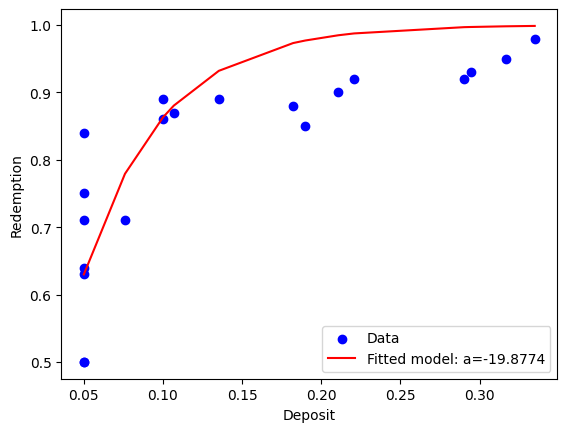

In [25]:
# Given data from the image
deposit = np.array([0.135295112, 0.29026766, 0.182224044, 0.294646277, 0.334873753,
                    0.106860959, 0.220787106, 0.316555872, 0.210779886, 0.189933523,
                    0.076, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.1, 0.05])
redemption = np.array([0.89, 0.92, 0.88, 0.93, 0.98, 0.87, 0.92, 0.95, 0.9, 0.85,
                       0.71, 0.5, 0.63, 0.71, 0.84, 0.5, 0.89, 0.64, 0.86, 0.75])

# Define the model function
def redemption_model(deposit, a):
    return 1 - 1*np.exp(a * deposit) #- 0.108

# Use curve_fit to find the best fit value of 'a'
params, covariance = curve_fit(redemption_model, deposit, redemption)
a_fit = params[0]

# Print the fitted value of 'a'
print(f"Fitted value of a: {a_fit}")

# Plot the data and the fitted curve
plt.scatter(deposit, redemption, label='Data', color='blue')
plt.plot(np.sort(deposit), redemption_model(np.sort(deposit), a_fit), label=f'Fitted model: a={a_fit:.4f}', color='red')
plt.xlabel('Deposit')
plt.ylabel('Redemption')
plt.legend()
plt.show()

# Create Approximated Optimization Model

In [26]:
def find_v_r_for_T_i_zero(d_i, v_m, P_i, A, f_s=0.009, c_d=0.014, f_a=0.1, c_f=278359, θ=19.877, τ=0.075, k=0.31, B=0.178, ψ=1.21, V=0):
    func = lambda v_r: T_i(v_r, d_i, v_m, P_i, A, f_s, c_d, f_a, c_f, θ, τ, k, B, ψ, V)
    v_r_initial_guess = 2/19.877  # Initial guess for fsolve
    funcprime = lambda v_r: smp.lambdify([sym_v_r, sym_d_i, sym_v_m, sym_P_i, sym_A, sym_B, sym_V], T_i_diff_v_r)(v_r, d_i, v_m, P_i, A, B, V)
    try:
        v_r_solution = newton(func, v_r_initial_guess, fprime=funcprime, maxiter=50)
    except:
        v_r_ub = 2
        if T_i(v_r_ub, d_i, v_m, P_i, A, f_s, c_d, f_a, c_f, θ, τ, k, B, ψ, V) > 0:
            v_r_solution = v_r_ub
        else:
            print('Error: negative v_r found')
            return
    return v_r_solution

def find_d_i_for_T_i_zero(d_i_ub, v_r, v_m, P_i, A, f_s=0.009, c_d=0.014, f_a=0.1, c_f=278359, θ=19.877, τ=0.075, k=0.31, B=0.178, ψ=1.21, V=0, verbose=False):
    func = lambda d_i: T_i(v_r, d_i, v_m, P_i, A, f_s, c_d, f_a, c_f, θ, τ, k, B, ψ, V, verbose)
    d_i_initial_guess = 0.5*d_i_ub
    funcprime = lambda d_i: T_i_diff_d_i(v_r, d_i, v_m, P_i, A, B, V)
    d_i_solution = newton(func, d_i_initial_guess, fprime=funcprime, maxiter=1000)
    return d_i_solution

In [27]:
def mtsn(v_m_ub, verbose=False):

    max_v_r_per_county = dict()
    for county in counties.values():

        if verbose:
            print(f"Computing v^r for {county.name} County")
            print('\tTradeoff =',T_i(1/19.877, distances_per_county[county.ID], v_m_ub, county.population, county.area, B=B_constant_per_county[county.ID],V=V_i[county.ID]))

        max_v_r_per_county[county.ID] = find_v_r_for_T_i_zero(distances_per_county[county.ID], v_m_ub, county.population, county.area,B=B_constant_per_county[county.ID],V=V_i[county.ID])

        if verbose:
            print('\tv^r =', max_v_r_per_county[county.ID])

    v_r_star = min(max_v_r_per_county.values())
    if verbose:
        print('v^r* =', v_r_star)

    optimal_distances_per_county = dict()
    for county in counties.values():
        if verbose:
            print(f"Computing d_i for {county.name} County")

        optimal_distances_per_county[county.ID] = find_d_i_for_T_i_zero(distances_per_county[county.ID], v_r_star, v_m_ub, county.population, county.area,B=B_constant_per_county[county.ID],V=V_i[county.ID])
        if optimal_distances_per_county[county.ID] < 0:
            find_d_i_for_T_i_zero(distances_per_county[county.ID], v_r_star, v_m_ub, county.population, county.area, B=B_constant_per_county[county.ID], V=V_i[county.ID], verbose=True)
            print('Error: negative distance found')
            return

        if verbose:
            print('\td_i =', optimal_distances_per_county[county.ID])
    return v_r_star, optimal_distances_per_county, max_v_r_per_county

In [28]:
class Solution():
    def __init__(self, v_r, distances_per_county, nb_recycling_centers, nb_recycled_bottles, redemption_rate):
        self.v_r = v_r
        self.distances_per_county = distances_per_county
        self.nb_recycling_centers = nb_recycling_centers
        self.nb_recycled_bottles = nb_recycled_bottles
        self.redemption_rate = redemption_rate

    def print(self):
        print('Value of redemption: ', self.v_r)
        print('Optimal average distances:')
        for county in counties.values():
            print('\t' + county.name + ':', self.distances_per_county[county.ID], 'mi')
        print(f'Number of recycling centers:\t{self.nb_recycling_centers}')
        print(f'Number of recycled bottles:\t{self.nb_recycled_bottles}')
        print(f'Redemption rate:\t{self.redemption_rate}')

In [29]:
def compute_stats(v_m_ub, verbose=False):
    optimal_v_r, optimal_distances_per_county, max_v_r_counties = mtsn(v_m_ub, verbose)
    nb_recycling_centers = 0
    nb_bottles = 0
    nb_recycled_bottles = 0
    redemption_rate = 0
    total_population = 0
    θ = 19.877
    τ = 0.075
    k = 0.31
    for county in counties.values():
        nb_recycling_centers += F_hat_i(optimal_distances_per_county[county.ID], county.population, county.area,B=B_constant_per_county[county.ID])
        R_i = 0.892 - 0.892*np.exp(-θ*(optimal_v_r) + τ*(optimal_distances_per_county[county.ID]) + k)
        nb_recycled_bottles += max(R_i*county.population*682.9,0)
        nb_bottles += county.population*682.9
        redemption_rate += max(R_i*county.population,0)
        total_population += county.population
    redemption_rate /= total_population
    redemption_rate_CS_CP_SP = 0.108
    redemption_rate += redemption_rate_CS_CP_SP
    nb_recycled_bottles +=redemption_rate_CS_CP_SP*nb_bottles
    print(max_v_r_counties)
    return Solution(optimal_v_r, optimal_distances_per_county, nb_recycling_centers, nb_recycled_bottles, redemption_rate)

# Current Solution

In [30]:
θ = 19.877
τ = 0.0747
k = 0.312
real_v_r = 0.076
nb_recycling_centers = 0
nb_bottles = 0
nb_recycled_bottles = 0
redemption_rate = 0
total_population = 0
dist_pop = 0
distance_modifier = 0
v_r_modifier = 0
T_total = 0
for county in counties.values():
    F_hat = F_hat_i(distances_per_county[county.ID]+distance_modifier, county.population, county.area,B=B_constant_per_county[county.ID])
    T = T_i(v_r=real_v_r+v_r_modifier, d_i=distances_per_county[county.ID]+distance_modifier, v_m=0.0015, P_i=county.population, A=county.area ,θ=θ,τ=τ,k=k,B=B_constant_per_county[county.ID])
    nb_recycling_centers += F_hat
    T_total += T
    R_i = 0.892 - 0.892*np.exp(-θ*(real_v_r+v_r_modifier) + τ*(distances_per_county[county.ID]+distance_modifier) + k)
    print(f"{county.ID}, {county.name}, R_i={np.round(R_i,2)}, F_i={F_hat}, d_i={distances_per_county[county.ID]+distance_modifier}, nb={max(R_i*county.population*682.9,0)}, {T+V_i[county.ID]}")
    nb_recycled_bottles += max(R_i*county.population*682.9,0)
    nb_bottles += county.population*682.9
    redemption_rate += max(R_i*county.population,0)
    total_population += county.population
    dist_pop += (distances_per_county[county.ID]+distance_modifier)*county.population
redemption_rate =nb_recycled_bottles/nb_bottles
redemption_rate_CS_CP_SP = 0.108 #RC-Recycling Center, CS-Curbside Program, CP-Dropoff/Collection Program, SP-Community Service Program
redemption_rate +=redemption_rate_CS_CP_SP
nb_recycled_bottles +=redemption_rate_CS_CP_SP*nb_bottles
real_solution = Solution(real_v_r, distances_per_county, nb_recycling_centers, nb_recycled_bottles, redemption_rate)
print('average distance',dist_pop/total_population)
print('nb_recycling_centers',nb_recycling_centers)
print('nb_recycled_bottles',nb_recycled_bottles)
print('redemption_rate',redemption_rate)
print('T_total',T_total)

6001, Alameda, R_i=0.57, F_i=12.0, d_i=2.261298239127406, nb=648816485.4313234, 16573438.565901645
6003, Alpine, R_i=-0.22, F_i=0.0, d_i=19.04777731845084, nb=0, 40760.50444203021
6005, Amador, R_i=0.5, F_i=3.0, d_i=5.060395125262591, nb=13105482.064153839, 654619.5737521772
6007, Butte, R_i=0.39, F_i=6.0, d_i=8.353097062323139, nb=60127329.29799007, 4559775.715256518
6009, Calaveras, R_i=0.39, F_i=2.0, d_i=8.259864063055977, nb=12227128.318003714, 666925.731443992
6011, Colusa, R_i=0.37, F_i=1.0, d_i=8.865146748174947, nb=5425640.15080823, 328050.053866556
6013, Contra Costa, R_i=0.51, F_i=12.0, d_i=4.776637067588885, nb=395966350.2612271, 16700952.348928768
6015, Del Norte, R_i=0.48, F_i=1.0, d_i=5.555024405893619, nb=9099173.188548438, 308419.6766748163
6017, El Dorado, R_i=0.53, F_i=7.0, d_i=4.045789237725721, nb=67995977.71658775, 1555042.5494732605
6019, Fresno, R_i=0.57, F_i=49.0, d_i=2.3155708273516074, nb=384687208.8813652, 4065849.886786118
6021, Glenn, R_i=0.54, F_i=3.0, d_i

In [31]:
solution_v_m_0015 = compute_stats(0.0015)
solution_v_m_0015.print()

{6001: 0.13924138728936675, 6003: 0.14911971093362844, 6005: 0.1739433847304913, 6007: 0.16347334346502676, 6009: 0.13459602206186302, 6011: 0.13443199506627213, 6013: 0.15683803727482593, 6015: 0.13030701021359775, 6017: 0.1197913208291884, 6019: 0.10059833590764394, 6021: 2, 6023: 0.1471646343895846, 6025: 0.16744642332369877, 6027: 2, 6029: 0.10132696119333783, 6031: 0.13491797371097716, 6033: 0.17160022393906363, 6035: 0.3065639620785573, 6037: 0.09970217008877133, 6039: 0.11608233778917293, 6041: 0.20852065850550833, 6043: 0.1408637815467397, 6045: 0.12603289276825191, 6047: 0.1099145169402001, 6049: 2, 6051: 0.14932424479368375, 6053: 0.12196482430117427, 6055: 0.12657527735591978, 6057: 0.20453167209261192, 6059: 0.11479089164840386, 6061: 0.1285174250210138, 6063: 2, 6065: 0.11185480463120152, 6067: 0.1178921447503031, 6069: 0.25286652045565455, 6071: 0.09998544512496098, 6073: 0.1293137161008563, 6075: 0.11705459431705964, 6077: 0.12260709924944987, 6079: 0.15428711800269324, 

In [32]:
solution_v_m_005 = compute_stats(0.005)
solution_v_m_005.print()

<lambdifygenerated-416>:2: RuntimeWarning: overflow encountered in scalar multiply
  return -18507.1369985331*Dummy_864*P_i*exp(-19.877*Dummy_864 + 0.075*d_i) + 812.637333650253*P_i*exp(-19.877*Dummy_864 + 0.075*d_i)
<lambdifygenerated-416>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -18507.1369985331*Dummy_864*P_i*exp(-19.877*Dummy_864 + 0.075*d_i) + 812.637333650253*P_i*exp(-19.877*Dummy_864 + 0.075*d_i)


{6001: 0.15934637527108284, 6003: 0.15499815880357382, 6005: 0.19911837227669962, 6007: 0.17984470556705426, 6009: 0.14634191858063042, 6011: 0.1456088930558845, 6013: 0.17707509966474524, 6015: 0.1442757666932892, 6017: 0.1341211843028025, 6019: 0.11511195430015995, 6021: 2, 6023: 0.16288267796286465, 6025: 0.18613026363546822, 6027: 2, 6029: 0.1162279641592219, 6031: 0.15463624583807015, 6033: 0.18577743829181517, 6035: 0.3379173025735999, 6037: 0.1153573138893257, 6039: 0.13130863565126114, 6041: 0.2383626771529366, 6043: 0.14999202313575732, 6045: 0.13843171559444797, 6047: 0.12572203395556317, 6049: 2, 6051: 0.15679133064432116, 6053: 0.13785498875208982, 6055: 0.1437336136839197, 6057: 0.2233902251384834, 6059: 0.13172460922666096, 6061: 0.14560585899977613, 6063: 2, 6065: 0.1274745613388032, 6067: 0.13478022461698713, 6069: 2, 6071: 0.11457655016459616, 6073: 0.14723936665508838, 6075: 0.13551098422401467, 6077: 0.13958186553813334, 6079: 0.17077706239098364, 6081: 0.16022470875

In [33]:
solution_v_m_01 = compute_stats(0.01)
solution_v_m_01.print()

{6001: 0.1998128897947912, 6003: 0.16411219588936216, 6005: 0.26423289730718014, 6007: 0.21141268494500257, 6009: 0.16605242157969655, 6011: 0.1641811567904946, 6013: 0.21969696293149696, 6015: 0.16845586773717341, 6017: 0.15849045161886322, 6019: 0.13841314199815577, 6021: 2, 6023: 0.19196277071448026, 6025: 0.2245992586369213, 6027: 2, 6029: 0.14034187842795293, 6031: 0.1934954575835626, 6033: 0.21201378151959027, 6035: 0.6173139533497013, 6037: 0.14078220581853573, 6039: 0.15732600745680872, 6041: 0.3499379535747844, 6043: 0.1647828314663433, 6045: 0.15914848786111668, 6047: 0.15246559140222618, 6049: 2, 6051: 0.16866373617208993, 6053: 0.16577494678769747, 6055: 0.17500063123683185, 6057: 0.26448019744925416, 6059: 0.1613958026131991, 6061: 0.17686198523087995, 6063: 2, 6065: 0.15399121585573236, 6067: 0.16464073960626652, 6069: 2, 6071: 0.1379693085079809, 6073: 0.18066586633580917, 6075: 0.16902330027647194, 6077: 0.17006739439981994, 6079: 0.202202165081636, 6081: 0.200917492437

In [34]:
solution_v_m_01 = compute_stats(0.0125)
solution_v_m_01.print()

{6001: 0.2328453787036505, 6003: 0.1690526822981601, 6005: 0.3927125812889972, 6007: 0.23447096143468338, 6009: 0.1778770101272467, 6011: 0.17517630570833642, 6013: 0.25718543828296353, 6015: 0.18367608373929142, 6017: 0.1736067808770242, 6019: 0.15214521250612575, 6021: 2, 6023: 0.2119911640628326, 6025: 0.2563878027268926, 6027: 2, 6029: 0.15470513582299483, 6031: 0.22406304314354641, 6033: 0.2298406706721538, 6035: 2, 6037: 0.15609086060448937, 6039: 0.17367988142833457, 6041: 2, 6043: 0.1732359861436363, 6045: 0.17158167763652576, 6047: 0.16921339218793569, 6049: 2, 6051: 0.17528388820392304, 6053: 0.1839550273023195, 6055: 0.1964954564605908, 6057: 0.30199799836728874, 6059: 0.1808850932091856, 6061: 0.1984238992596481, 6063: 2, 6065: 0.17061941762627397, 6067: 0.1844323446130428, 6069: 2, 6071: 0.15174900531885688, 6073: 0.20450451795517757, 6075: 0.19235064272885558, 6077: 0.1906394519854786, 6079: 0.22483609191908532, 6081: 0.2343272476753227, 6083: 0.23073967382917626, 6085: 0

In [35]:
solution_v_m_025 = compute_stats(0.025)
solution_v_m_025.print()

{6001: 2, 6003: 0.19963695951194874, 6005: 2, 6007: 2, 6009: 0.3353530717255388, 6011: 0.2942139646247607, 6013: 2, 6015: 2, 6017: 2, 6019: 2, 6021: 2, 6023: 2, 6025: 2, 6027: 2, 6029: 2, 6031: 2, 6033: 2, 6035: 2, 6037: 2, 6039: 2, 6041: 2, 6043: 0.2400565592671762, 6045: 0.36396432617846236, 6047: 2, 6049: 2, 6051: 0.22098067799539503, 6053: 2, 6055: 2, 6057: 2, 6059: 2, 6061: 2, 6063: 2, 6065: 2, 6067: 2, 6069: 2, 6071: 2, 6073: 2, 6075: 2, 6077: 2, 6079: 2, 6081: 2, 6083: 2, 6085: 2, 6087: 2, 6089: 2, 6091: 2, 6093: 0.3233083237330725, 6095: 2, 6097: 2, 6099: 2, 6101: 2, 6103: 2, 6105: 2, 6107: 2, 6109: 2, 6111: 2, 6113: 2, 6115: 2}
Value of redemption:  0.19963695951194874
Optimal average distances:
	Alameda: 0.9690405188446753 mi
	Alpine: 19.047777317476104 mi
	Amador: 4.05961781541784 mi
	Butte: 5.582220866251058 mi
	Calaveras: 6.982768499879724 mi
	Colusa: 7.654642424411178 mi
	Contra Costa: 2.293949177364765 mi
	Del Norte: 4.400246326631484 mi
	El Dorado: 3.2756311316251545 mi